### Chepter 03. 분류(Classification) ###

## Mnist DataSets ##

In [1]:
# import lib

import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt


In [2]:
# Load datasets

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)


as_frame 속성을 True로 주게 되면 pd.DataFrame로 반환,  
as_frame 속성을 False로 주게 되면 np.ndarray로 반환

### Mnist datasets 속성 분석 ###

In [3]:
# datasets key

mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

python dic type의 datasets에서 key 값을 통해 value 호출 후 파악, 분석 

In [4]:
mnist['data']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Train datasets's main features

In [5]:
mnist['target']

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

Target == label, y_value (쉽게 말해서, 지도학습의 정답 값)  

In [6]:
pd.DataFrame(mnist['feature_names']).head()

,0
0,pixel1
1,pixel2
2,pixel3
3,pixel4
4,pixel5


각 sample에 대한 feature_names는 각 pixel 이름   
28 by 28 size Matrix == n(feature) = 784

In [7]:
mnist['DESCR']

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

해당 DataSets의 설명, 요약, 철학

In [8]:
mnist['details']

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'description_version': '1',
 'format': 'ARFF',
 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'],
 'upload_date': '2014-09-29T03:28:38',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'minio_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

DAtaSets 의 상세정보

In [9]:
mnist['categories']

{}

NaN data Features  
Features == pixel value 이기 때문에 따로 categories 필요 없음

각 key 값에 대한 value check  
여기서 main feature를 X_value로, label을 y_value로 사용  
```python
main_feaure == minst['data'], label == mnist['target']
```

### DataSets 구성 ###

In [10]:
# 필요한 column 추출 설정
X, y = mnist['data'], mnist['target'] # X 를 data column, y 를 target column을 끌어와서 사용

In [11]:
X.shape

(70000, 784)

Mnist dataset의 원본은 (28, 28, 1) GrayScale 2D Matrix이지만, 여기서 주어진 dataset은 Flatten 처리 되어있음.

원본 Mnist datasets 참고 url : https://www.tensorflow.org/datasets/catalog/mnist

In [12]:
print(type(X))

<class 'numpy.ndarray'>


In [13]:
visual_sample = X[0].reshape(28, 28)


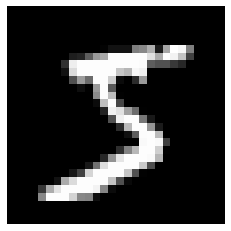

In [14]:
plt.imshow(visual_sample, cmap='gray')
plt.axis('off')

plt.show()


28 by 28 grayscale binary image

In [15]:
y.dtype

dtype('O')

y data value의 data type이 문자형으로 표시되어있음  
대부분의 머신러닝 알고리즘은 숫자형 Data Type을 기대하기 때문에 TypeCast 진행  

In [16]:
# y TypeCast
y = y.astype(np.uint8)

from char type to (unsigned int(8bit))

## Data Preprocessing ##

### DataSet Split ###  
dataset을 Train data, valid(test) data로 분리  
검증 과정 전까지 valid data는 건드리지 않는다.  
  
Chepter 02에서 housing price dataset에서, 일반적인 train_valid 비율인 8:2로 Split했지만,  
Mnist dataset에서는 train:valid = 60000:10000 비율로 Split

In [17]:
# dataset split
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[:60000]

In [18]:
X_train.shape

(60000, 784)

## 분류기(Classifier) 훈련 ##

### 이진 분류기 (Binary Classifier) ###
각 smaple에 대해 숫자 '5'인지 아닌지 판단하는 이진 분류기 구현

In [19]:
y_train_5 = (y_train == 5) # train data에서 label 값이 5인 경우만 추출
y_test_5 = (y_test == 5) # test data에서 label 값이 5인 경우만 추출


#### 확률적 경사하강법 (Stochastic gradient descent) #### 

In [20]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [21]:
# Predict
sgd_clf.predict([visual_sample.reshape(784,)]) # Visualization을 진행했던 사진을 5로 예측했는지에 대한 물음 진행

array([ True])

성능 측정을 위해 교차 검증(Cross Validation) 이용

In [22]:
# Cross Validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Cross Validation 3회(Subset 3개)  
Scoring = 정확도 기준으로 평가  
  
결과는 모두 95%에 가깝게 나왔기 때문에 성능이 매우 좋은 모델로 평가될 수도 있음  
더 정확한 결과를 알아보기위해 더미를 생성 후 넣어보고 결과를 확인


##### 더미 생성 후 모델 평가 #####

In [23]:
from sklearn.base import BaseEstimator # 기본 추정기 생성 모델

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

더미 체킹을 진행해도 ACC 90%이상으로 나옴  
총 labels가 10개, 그 중에서 '5'에 해당하는 10%를 제외한 모든 samples에 대해 False값을 반환 받기 때문에  
더미 체킹 과정에서 모두 다 False로 예측한다면, '5' label을 가진 sample을 제외한 다른 값들에 대해서 올바른 예측이 되어버림

#### 오차 행렬(Confusion Matrix) ####  
각 Class(label)별 예측 결과를 정리해둔 행렬  
행은 실제 클래스를, 열은 예측된 클래스를 가리킴


In [24]:
# 오차행렬 pandas 를 통해 구현
Confusion_Matrix_ex = pd.DataFrame([["실제 음성, 예측 음성(TN)", "실제 음성, 예측 양성(FP)"],
                                    ["실제 양성, 예측 음성(FN)", "실제 양성, 예측 양성(TP)"]], index=['실제 음성', '실제 양성'], columns=['예측 음성', '예측 양성'])


Confusion_Matrix_ex

,예측 음성,예측 양성
실제 음성,"실제 음성, 예측 음성(TN)","실제 음성, 예측 양성(FP)"
실제 양성,"실제 양성, 예측 음성(FN)","실제 양성, 예측 양성(TP)"


In [25]:
# 비교 분석을 위해 예측값 필요
from sklearn.model_selection import cross_val_predict # cross_val_score 처럼 교차검증을 하는데 리턴 값이 점수가 아닌 예측값임
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,)

Sklearn 함수를 이용해서 실제 오차 행렬 제작

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

실제 5가 아닌 값을 5가 아니라고 판단된 n(sample) == 53892    

                             .  
                             .  
                             .  

#### 정밀도(Precision) ####
오차행렬에서 뽑은 정보를 가지고 요약이 필요한 경우가 있다.  
양성으로 예측한 수 대비 진양성 비율을 정밀도라고 한다.(양성 예측의 정확도)  
  
Precision = TP/TP+FP

In [27]:
# Precision
from sklearn.metrics import precision_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

#### 재현율(Recall) ####  
  
양성 샘플에 대한 정확도,  
민감도(Sensitivity), 참 양성 비율(True postive rate)  
  
Recall = TP/TP + FN

In [28]:
# Recall
from sklearn.metrics import recall_score

recall_score(y_train_5, y_train_pred)

0.6511713705958311

#### F1 점수 (F1-Score) ####
  
정밀도와 재현율의 조화평균으로, 두 지표의 모든 특징을 반영할 수 있음  
정밀도와 재현율이 비슷하면 F1-Score는 높게 나타나지만, 그러다고 마냥 좋다고 볼 수는 없는 지표이다.  
EX) 유튜브 키즈 알고리즘 (P.136)

In [29]:
# F1-Score
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

#### 정밀도, 재현율의 상관관계 ####

정밀도와 재현율은 경향성 방면에서 서로 트레이드오프 관계로, 각 모델별로 적절히 조율해서 사용하는게 베스트  


정밀도와 재현율의 트레이드오프 관계 예시  

![img][Ex-prec-recall traidoff](..\img\Ex-prec-recall traidoff.jpg)

##### 결정함수(Decision Function)와 결정 임계값(Decision Threshold) ####  
  
결정 임계값을 정하는 결정함수의 역할에 따라 Positive Class와 Negative Class를 결정하는 기준이 바뀐다.  
Code Block [13]에서 시각화에 사용했던 sample인 visual_sample의 점수를 확인하고 그것을 기준으로 임계값을 조정

In [30]:
visual_sample = visual_sample.reshape(784,).copy() # Visualization에 사용했던 Sample에 대해서 2D -> 1D로 Flatten

*Sklearn의 함수들은 2D 미만의 np.ndarray를 기대하기 때문에 Flatten 시켜주지않으면 코드가 작동하지 않음*

In [31]:
# Deicsion Function with Threshold
y_scores = sgd_clf.decision_function([visual_sample])


In [32]:
y_scores

array([2164.22030239])

만약 Decision Threshold를 0으로 준다면,

In [33]:
threshold = 0
y_visual_sample_pred = (y_scores > threshold) # 임계값보다 yscores가 크기때문에 True 반환

y_visual_sample_pred

array([ True])

Decision Threshold를 y_scores보다 크게 준다면,

In [34]:
threshold = 8000
y_visual_sample_pred = (y_scores > threshold) # 임계값보다 yscores가 작기때문에 False 반환

y_visual_sample_pred

array([False])

### PRC(Pricision-Recall Curve) ###  
  
PRC를 그리기 위해서 모든 y 값에 대한 예측값을 가져와야한다.

In [37]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [39]:
# precision_recall_curve 함수는 3개의 return값을 반환한다. 이를 바탕으로 PRC를 그릴 수 있다.
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

PRC 시각화 (코드 복사해서 사용함)

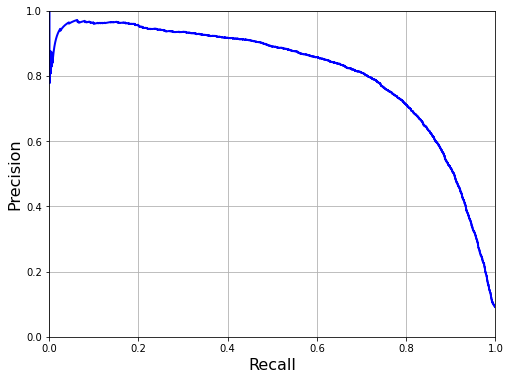

In [41]:
# 정밀도 재현률 곡선 (PRC)

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)

# recall 이 x축, precision이 y축
# 오른쪽 위쪽에 붙어있을수록 좋은 모델
# recall이 80정도에 precision이 급격히 줄어든다 : 적절한 위치의 임계값
# 커브아래의 면적이 크면 좋은 모델

만약, 정밀도 90%의 달성이 목표인 분류기를 만든다면, 정밀도가 90%인 지점의 Threshold 값을 찾아야함

In [44]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

threshold_90_precision

3370.0194991439557

이 Precision에서의 recall_score 확인

In [45]:
y_train_pred_90 = (y_scores > threshold_90_precision)

In [46]:
# 앞선 코드와 반대로, threshold를 이용한 Precision 구하기 (여기서는 검산의 역할)
precision_score(y_train_5, y_train_pred_90)

0.9

In [47]:
recall_score(y_train_5, y_train_pred_90)

0.47980077476480354

이 Classifier는 Precision 0.90 에서 Recall 0.47..을 가지는 Classifier 이다.